In [120]:
import numpy as np
import re
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import plotly.express as px
import scipy.stats as stats
import scipy.cluster.hierarchy as ch
import calendar
import datetime

In [129]:
data = pd.read_csv(r'C:\Users\Mannahil Miftah\Downloads\retail_services.csv')
data.head(10)

,time.index,time.month,time.month name,time.period,time.year,data.inventories.all department stores,data.inventories.all other home furnishings stores,data.inventories.all other merchandise stores,data.inventories.appliances and other electronics stores,data.inventories.auto and other motor vehicles,...,"data.sales.retail trade and food services, ex auto","data.sales.retail trade, ex auto",data.sales.shoe stores,data.sales.sporting goods stores,"data.sales.sporting goods, hobby, book, and music stores",data.sales.supermarkets and other grocery (except convenience) stores,data.sales.used car dealers,data.sales.used merchandise stores,data.sales.warehouse clubs and superstores,data.sales.women's clothing stores
0,1,1,Jan,Jan1992,1992,0,0,0,0,0,...,116565,100872,1206,972,3439,0,1744,371,2579,1873
1,2,2,Feb,Feb1992,1992,0,0,0,0,0,...,115862,100027,1265,1100,3264,0,1990,402,2615,1991
2,3,3,Mar,Mar1992,1992,0,0,0,0,0,...,124200,107352,1463,1214,3473,0,2177,419,2838,2403
3,4,4,Apr,Apr1992,1992,0,0,0,0,0,...,127587,111093,1675,1267,3523,0,2601,393,2984,2665
4,5,5,May,May1992,1992,0,0,0,0,0,...,133608,115960,1560,1293,3545,0,2171,435,3257,2752
5,6,6,Jun,Jun1992,1992,0,0,0,0,0,...,130274,113460,1498,1334,3611,0,2207,519,3107,2424
6,7,7,Jul,Jul1992,1992,0,0,0,0,0,...,132076,114772,1449,1340,3637,0,2251,443,3097,2373
7,8,8,Aug,Aug1992,1992,0,0,0,0,0,...,134928,117040,1838,1377,3986,0,2087,532,3288,2657
8,9,9,Sep,Sep1992,1992,0,0,0,0,0,...,128734,112275,1578,1206,3797,0,2016,523,3078,2560
9,10,10,Oct,Oct1992,1992,0,0,0,0,0,...,136917,119249,1529,1120,3758,0,2149,483,3429,2755


In [130]:
print(list(data.keys()))

['time.index', 'time.month', 'time.month name', 'time.period', 'time.year', 'data.inventories.all department stores', 'data.inventories.all other home furnishings stores', 'data.inventories.all other merchandise stores', 'data.inventories.appliances and other electronics stores', 'data.inventories.auto and other motor vehicles', 'data.inventories.automobile dealers', 'data.inventories.automotive parts and tire stores', 'data.inventories.beer, wine, and liquor stores', 'data.inventories.book stores', 'data.inventories.building materials and garden supplies dealers', 'data.inventories.building supplies dealers', 'data.inventories.clothing stores', 'data.inventories.computer and software stores', 'data.inventories.discount department stores', 'data.inventories.drinking places', 'data.inventories.electronic shopping and mail-order houses', 'data.inventories.electronics and appliance stores', 'data.inventories.family clothing stores', 'data.inventories.floor covering stores', 'data.inventor

In [131]:
data.shape

(289, 197)

In [132]:
data.dtypes

time.index                                                                int64
time.month                                                                int64
time.month name                                                          object
time.period                                                              object
time.year                                                                 int64
                                                                          ...  
data.sales.supermarkets and other grocery (except convenience) stores     int64
data.sales.used car dealers                                               int64
data.sales.used merchandise stores                                        int64
data.sales.warehouse clubs and superstores                                int64
data.sales.women's clothing stores                                        int64
Length: 197, dtype: object

##### How has retail economic activity in the United States changed over the past five years?

In [133]:
# columns which are of retail

retail_col = [i for i in data.columns
                if i.startswith('data.sales.retail')]

In [134]:
retail_col

['data.sales.retail trade',
 'data.sales.retail trade and food services',
 'data.sales.retail trade and food services, ex auto',
 'data.sales.retail trade, ex auto']

In [135]:
# copy the data of retail columns only

last_5_years = data[['time.year'] + retail_col].copy()
last_5_years.head(10)

,time.year,data.sales.retail trade,data.sales.retail trade and food services,"data.sales.retail trade and food services, ex auto","data.sales.retail trade, ex auto"
0,1992,130683,146376,116565,100872
1,1992,131244,147079,115862,100027
2,1992,142488,159336,124200,107352
3,1992,147175,163669,127587,111093
4,1992,152420,170068,133608,115960
5,1992,151849,168663,130274,113460
6,1992,152586,169890,132076,114772
7,1992,152476,170364,134928,117040
8,1992,148158,164617,128734,112275
9,1992,155987,173655,136917,119249


In [136]:
last_5_years = last_5_years[last_5_years['time.year'] >= 2012]
last_5_years.head(5)

,time.year,data.sales.retail trade,data.sales.retail trade and food services,"data.sales.retail trade and food services, ex auto","data.sales.retail trade, ex auto"
240,2012,315626,355332,293066,253360
241,2012,331777,372782,302230,261225
242,2012,368818,414545,333112,287385
243,2012,349455,393289,319594,275760
244,2012,373374,418940,338945,293379


In [137]:
year = last_5_years.groupby('time.year')[retail_col].sum()
year

,data.sales.retail trade,data.sales.retail trade and food services,"data.sales.retail trade and food services, ex auto","data.sales.retail trade, ex auto"
time.year,,,,
2012,4306237,4831131,3943141,3418247
2013,4469022,5011740,4049759,3507041
2014,4632289,5208443,4174533,3598379
2015,4699327,5321997,4215309,3592639
2016,350025,400249,319532,269308


<AxesSubplot:xlabel='time.year', ylabel='data.sales.retail trade, ex auto'>

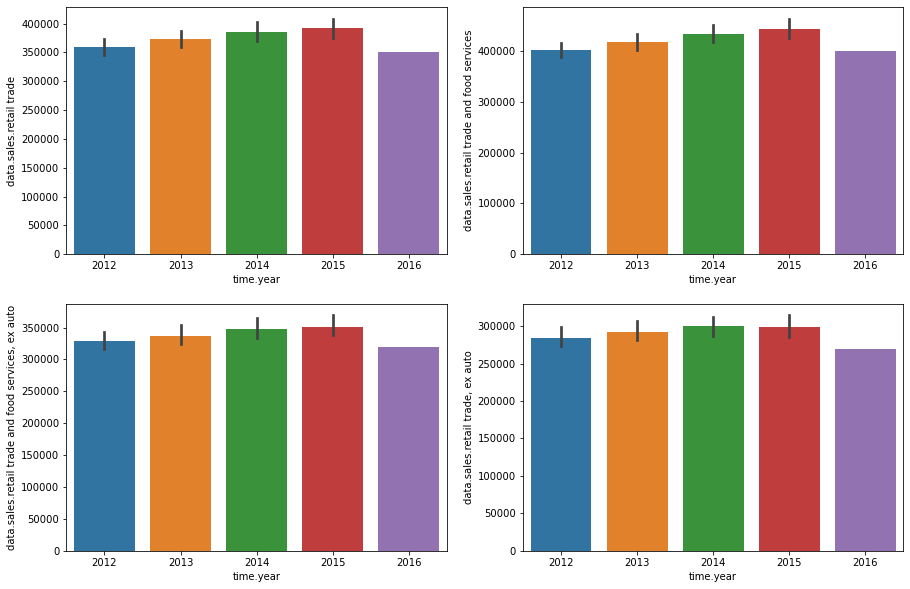

In [138]:
fig, axes = plt.subplots(2,2, figsize=(15, 10))
sb.barplot(data = last_5_years, x = 'time.year', y = 'data.sales.retail trade', ax = axes[0,0])
sb.barplot(data = last_5_years, x = 'time.year', y = 'data.sales.retail trade and food services', ax = axes[0,1])
sb.barplot(data = last_5_years, x = 'time.year', y = 'data.sales.retail trade and food services, ex auto', ax = axes[1,0])
sb.barplot(data = last_5_years, x = 'time.year', y = 'data.sales.retail trade, ex auto', ax = axes[1,1])

##### What are the key differences between the Advance Monthly Retail Trade Survey (MARTS) and the Annual Retail Trade Survey (ARTS)?


##### MARTS is conducted on monthly basis whereas ARTS is conducted is on yearly basis.
##### MARTS is for short-term analysis whereas ARTS is for long-term analysis.

In [139]:
marts = pd.DataFrame(data.groupby('time.period')['data.sales.all department stores'].sum()).reset_index()
arts = pd.DataFrame(data.groupby('time.year')['data.sales.all department stores'].sum()).reset_index()
marts = marts.sort_values(by = 'data.sales.all department stores', ascending = False)
arts = arts.sort_values(by = 'data.sales.all department stores', ascending = False)

<AxesSubplot:xlabel='time.period', ylabel='data.sales.all department stores'>

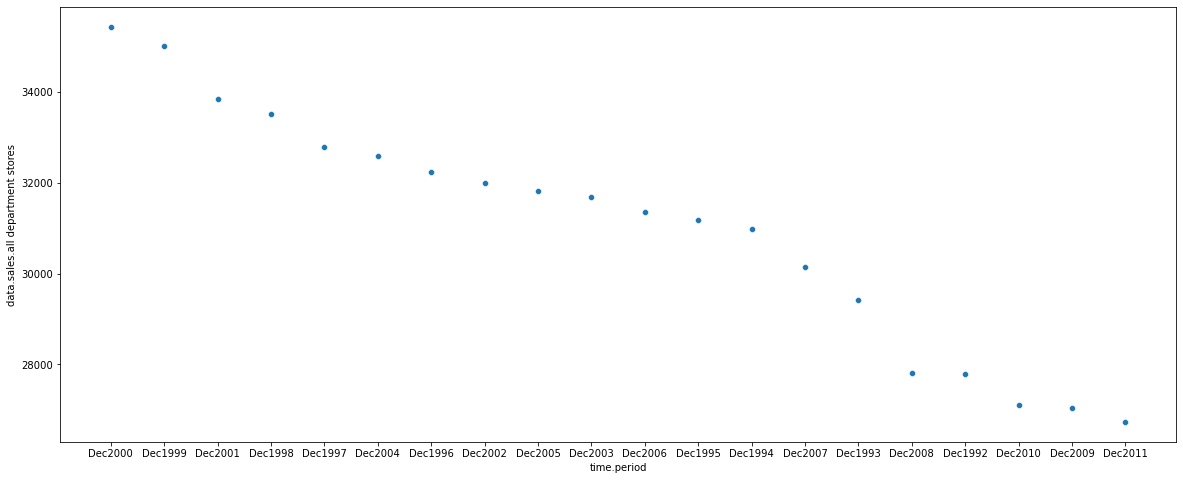

In [140]:
plt.figure(figsize=[20,8])
sb.scatterplot(data = marts.head(20), x = 'time.period', y = 'data.sales.all department stores')

<AxesSubplot:xlabel='time.year', ylabel='data.sales.all department stores'>

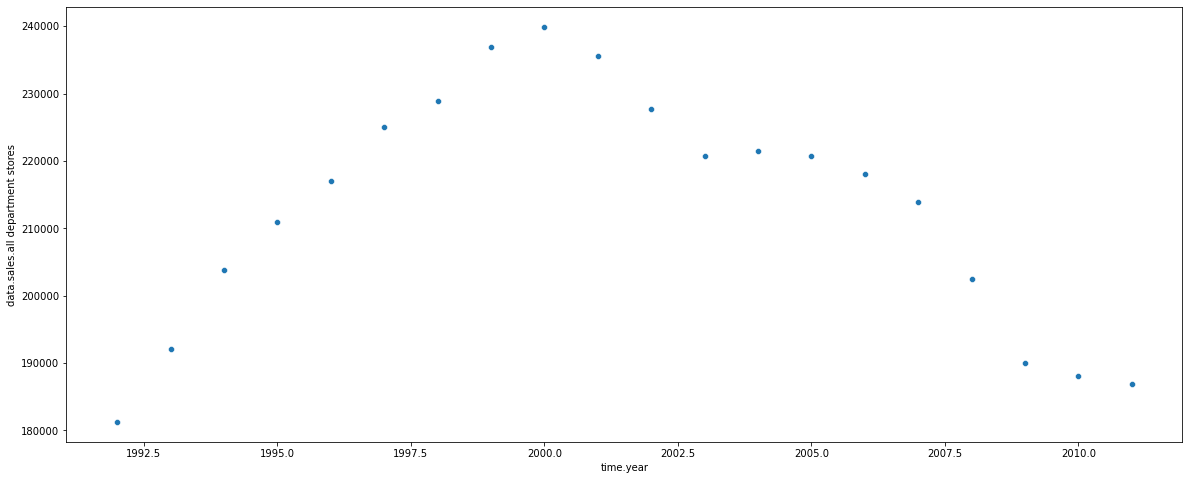

In [141]:
plt.figure(figsize=[20,8])
sb.scatterplot(data = arts.head(20), x = 'time.year', y = 'data.sales.all department stores')

##### Can we identify any seasonal patterns or trends in monthly retail sales data?

In [142]:
group = pd.DataFrame(data.groupby('time.period')['data.sales.all department stores'].sum())
group = group.sort_values(by = 'data.sales.all department stores', ascending = False).reset_index()
group.head(10)

,time.period,data.sales.all department stores
0,Dec2000,35437
1,Dec1999,35002
2,Dec2001,33838
3,Dec1998,33509
4,Dec1997,32783
5,Dec2004,32593
6,Dec1996,32246
7,Dec2002,31987
8,Dec2005,31821
9,Dec2003,31697


Text(0, 0.5, 'Sales')

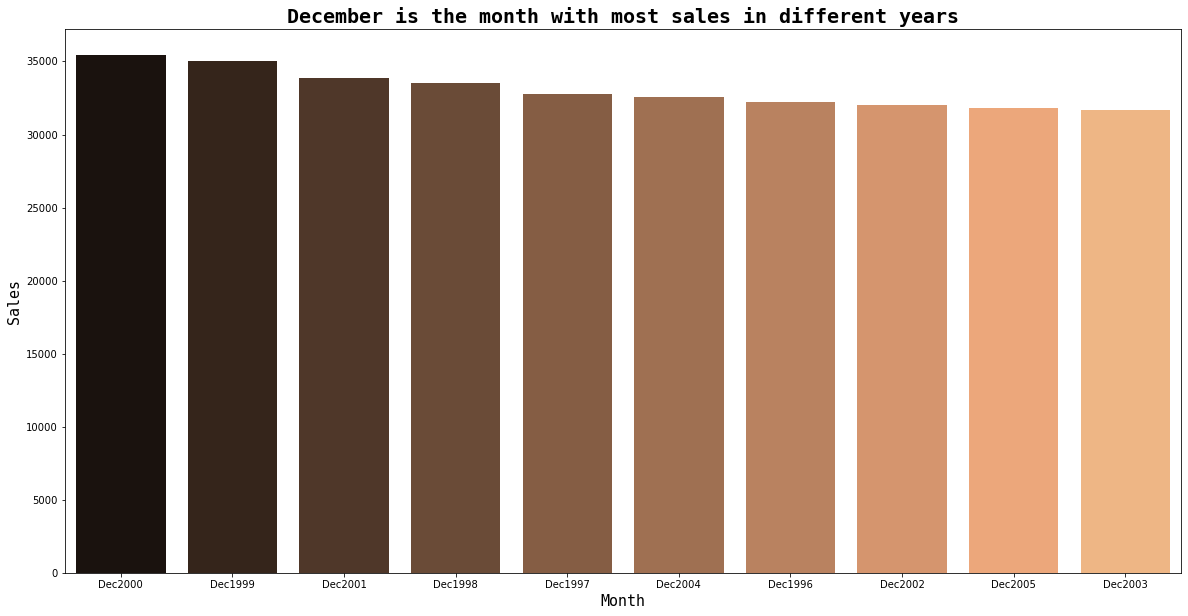

In [143]:
plt.figure(figsize=[20,10])
sb.barplot(data = group.head(10), x = 'time.period', y = 'data.sales.all department stores', palette = 'copper')
plt.title('December is the month with most sales in different years', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Month', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Sales', fontdict={'fontname':'Monospace', 'fontsize': 15,})

In [144]:
group = group.sort_values(by = 'data.sales.all department stores', ascending = True)
group.head(10)

,time.period,data.sales.all department stores
288,Jan1992,10560
287,Jan2016,10571
286,Jan2014,10879
285,Jan2015,11083
284,Jan1993,11429
283,Feb2015,11466
282,Feb1992,11549
281,Feb1993,11595
280,Jan2013,11621
279,Jan2012,11659


Text(0, 0.5, 'Sales')

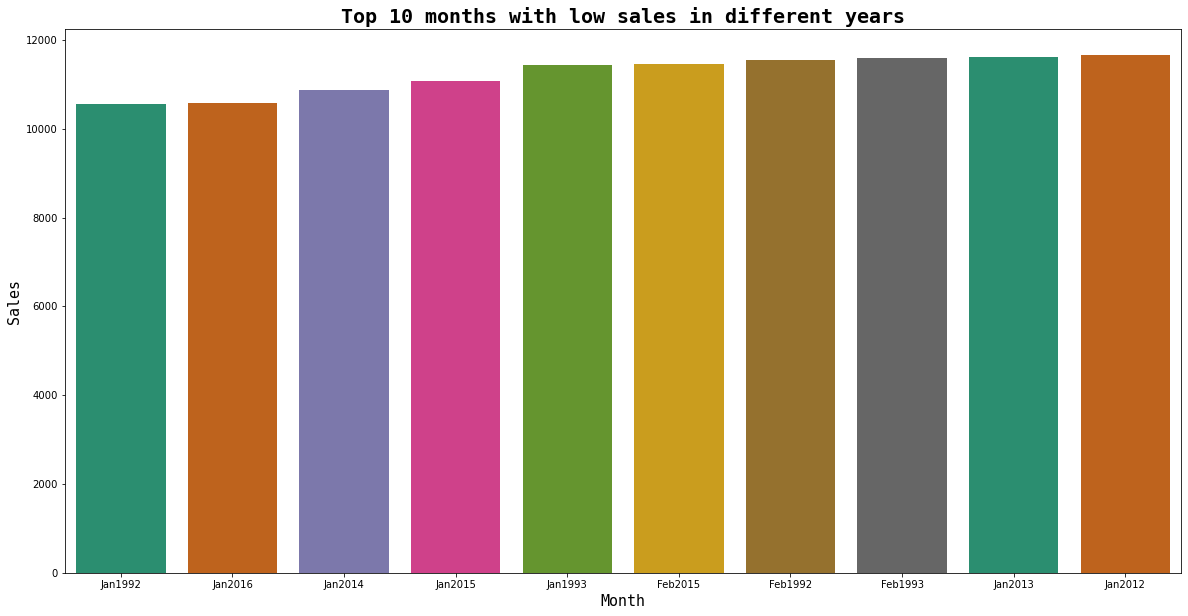

In [145]:
plt.figure(figsize=[20,10])
sb.barplot(data = group.head(10), x = 'time.period', y = 'data.sales.all department stores', palette = 'Dark2')
plt.title('Top 10 months with low sales in different years', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Month', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Sales', fontdict={'fontname':'Monospace', 'fontsize': 15,})

In [146]:
month_retail = pd.DataFrame(data.groupby('time.month name')[retail_col].sum())
month_retail = month_retail.reset_index()
month_retail

,time.month name,data.sales.retail trade,data.sales.retail trade and food services,"data.sales.retail trade and food services, ex auto","data.sales.retail trade, ex auto"
0,Apr,6481734,7230380,5638605,4889959
1,Aug,6854640,7641463,5958068,5171245
2,Dec,7880138,8656280,7177051,6400909
3,Feb,5797595,6477927,5071056,4390724
4,Jan,6164222,6896777,5479533,4746978
5,Jul,6691865,7472735,5815511,5034641
6,Jun,6688287,7453211,5802005,5037081
7,Mar,6578999,7340909,5680510,4918600
8,May,6852754,7639097,5967901,5181558
9,Nov,6710011,7439880,6027567,5297698


Text(0, 0.5, 'Sales')

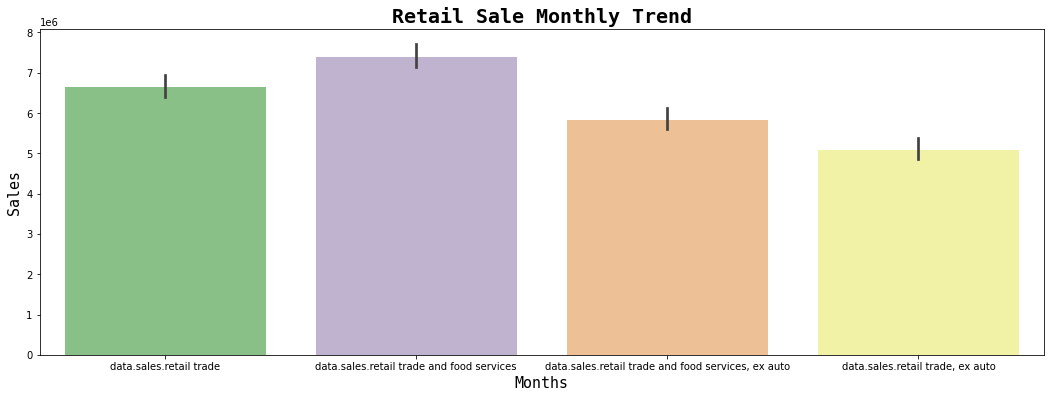

In [147]:
plt.figure(figsize=[18,6])
sb.barplot(data = month_retail, palette = 'Accent')
plt.title('Retail Sale Monthly Trend', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Months', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Sales', fontdict={'fontname':'Monospace', 'fontsize': 15,})

#### How does e-commerce activity compare to traditional retail sales on a quarterly basis?

In [173]:
data1 = data.copy()
data1 ['time.period'] = pd.to_datetime(data['time.period'])
data1['Quarter'] = data1['time.period'].dt.to_period('Q')

In [177]:
ecommerce_sales = data1.groupby('Quarter')['data.sales.electronic shopping and mail-order houses'].sum()
traditional_sales = data1.groupby('Quarter')[retail_col].sum()
ecommerce_sales.index = ecommerce_sales.index.to_timestamp()
traditional_sales.index = traditional_sales.index.to_timestamp()

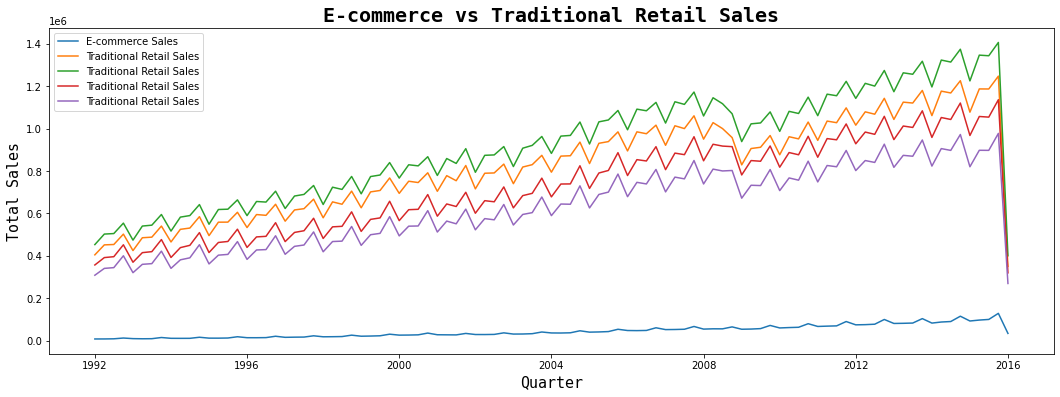

In [201]:
plt.figure(figsize=[18,6])
plt.plot(ecommerce_sales.index, ecommerce_sales, label='E-commerce Sales')
plt.plot(traditional_sales.index, traditional_sales, label='Traditional Retail Sales')
plt.title('E-commerce vs Traditional Retail Sales', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Quarter', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Total Sales', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.legend()
plt.show()

#### Are there any specific retail sectors that have shown significant growth or decline in recent years?

In [186]:
data_copy = data.copy()
data_copy['time.index'] = pd.to_datetime(data['time.index'])

In [200]:
grouping = data_copy.groupby('time.index')[retail_col].sum()
grouping = grouping.reset_index()
grouping.head(2)

,time.index,data.sales.retail trade,data.sales.retail trade and food services,"data.sales.retail trade and food services, ex auto","data.sales.retail trade, ex auto"
0,1970-01-01 00:00:00.000000001,130683,146376,116565,100872
1,1970-01-01 00:00:00.000000002,131244,147079,115862,100027


No handles with labels found to put in legend.


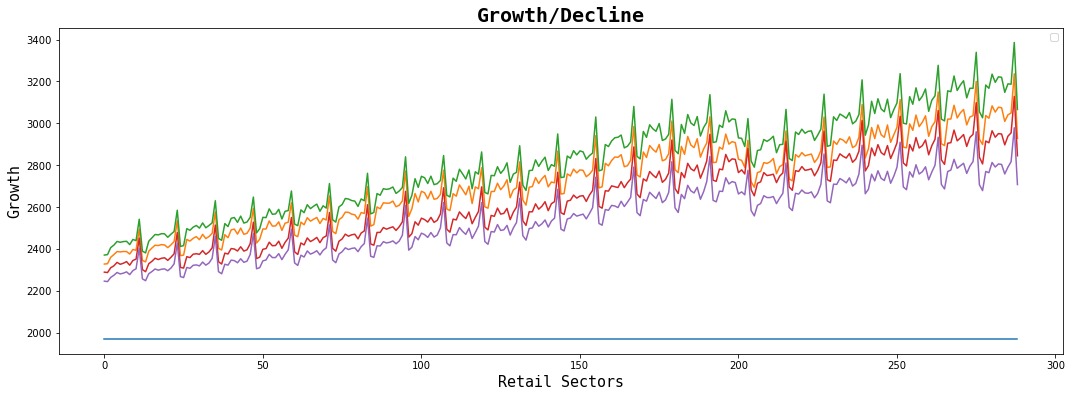

In [202]:
plt.figure(figsize=[18,6])
plt.plot(grouping)
plt.title('Growth/Decline', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Retail Sectors', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Growth', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.show()

#### What is the overall contribution of retail trade to the United States' GDP?

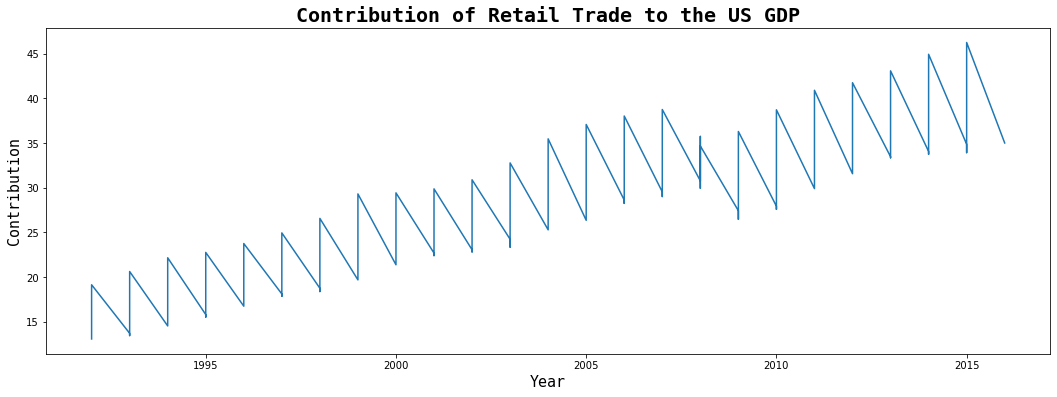

In [205]:
data_copy['gdp'] = (data_copy['data.sales.retail trade'] / 1000000) * 100
plt.figure(figsize=[18,6])
plt.plot(data_copy['time.year'], data_copy['gdp'])
plt.title('Contribution of Retail Trade to the US GDP', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Year', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Contribution', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.show()

#### How do retail operating expenses vary across different types of businesses?

In [225]:
businesses = [i for i in data.columns
                if i.startswith('data.inventories')]

diff = pd.DataFrame(data_copy.groupby('time.year')[businesses].sum())
diff.head(2)

,data.inventories.all department stores,data.inventories.all other home furnishings stores,data.inventories.all other merchandise stores,data.inventories.appliances and other electronics stores,data.inventories.auto and other motor vehicles,data.inventories.automobile dealers,data.inventories.automotive parts and tire stores,"data.inventories.beer, wine, and liquor stores",data.inventories.book stores,data.inventories.building materials and garden supplies dealers,...,"data.inventories.retail trade and food services, ex auto","data.inventories.retail trade, ex auto",data.inventories.shoe stores,data.inventories.sporting goods stores,"data.inventories.sporting goods, hobby, book, and music stores",data.inventories.supermarkets and other grocery (except convenience) stores,data.inventories.used car dealers,data.inventories.used merchandise stores,data.inventories.warehouse clubs and superstores,data.inventories.women's clothing stores
time.year,,,,,,,,,,,,,,,,,,,,,
1992,0,0,0,0,0,0,0,0,0,246458,...,0,2228092,0,0,0,0,0,0,0,0
1993,0,0,0,0,0,0,0,0,0,263226,...,0,2380837,0,0,0,0,0,0,0,0


In [226]:
zero_cols = [ col for col, is_zero in ((diff == 0).sum() == diff.shape[0]).items() if is_zero ]
diff.drop(zero_cols, axis=1, inplace=True)
diff.head(2)

,data.inventories.building materials and garden supplies dealers,data.inventories.clothing stores,data.inventories.food and beverage stores,"data.inventories.furniture, home furn, electronics, and appliance stores",data.inventories.general merchandise stores,data.inventories.motor vehicle and parts dealers,data.inventories.non-leased department stores,data.inventories.retail trade,"data.inventories.retail trade, ex auto"
time.year,,,,,,,,,
1992,246458,313147,326498,180985,580215,785708,447726,3013800,2228092
1993,263226,335570,330438,202594,631181,865091,482812,3245928,2380837


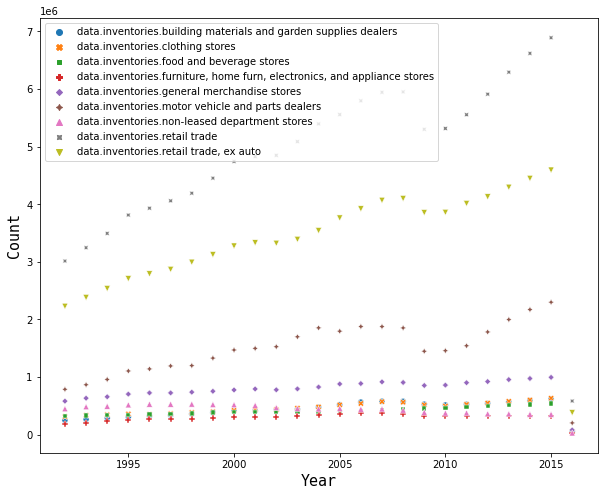

In [233]:
plt.figure(figsize=[10,8])
sb.scatterplot(data = diff)
plt.xlabel('Year', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Count', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.show()

#### Is there a relationship between e-commerce sales and brick-and-mortar retail sales?

In [234]:
corr = data['data.sales.electronic shopping and mail-order houses'].corr(data['data.sales.hardware stores'])
print("Correlation is", corr)

Correlation is 0.791367000392785


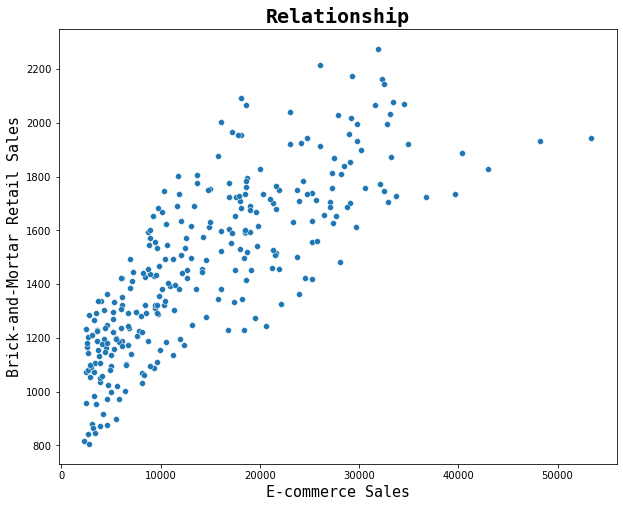

In [236]:
plt.figure(figsize=[10,8])
sb.scatterplot(data = data, x = 'data.sales.electronic shopping and mail-order houses', y = 'data.sales.hardware stores')
plt.title('Relationship', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('E-commerce Sales', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Brick-and-Mortar Retail Sales', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.show()

#### How accurate are the monthly estimates compared to the annual survey data?

In [237]:
# Monthly survey is performed 12 times a year whereas annual survey is performed only once at then end of year.
# By performing monthly survey we can clear insights about the data and the changes which might occur whereas in
# annual survey data can be unreliable as changes might happen throughout the year & it can be complex as well.

##### Can we identify any correlations between retail sales and macroeconomic indicators such as unemployment rates or consumer sentiment?
##### Can we identify any discrepancies between the retail data collected by MARTS, MRTS, ARTS, and the Economic Census of Retail Trade?
##### How do the retail sales patterns differ between rural and urban areas?
##### Are there any geographical variations in retail sales trends across different states or regions?
##### What is the market share of e-commerce sales compared to traditional retail sales?
##### How have retail operating expenses changed over the past decade?
##### What insights can we gain from comparing the detailed business operating expenses collected in the Business Expenses Supplement with other retail data sources?

In [238]:
# Data is not provided for the above tasks

#### What are the main factors influencing fluctuations in monthly retail sales data?

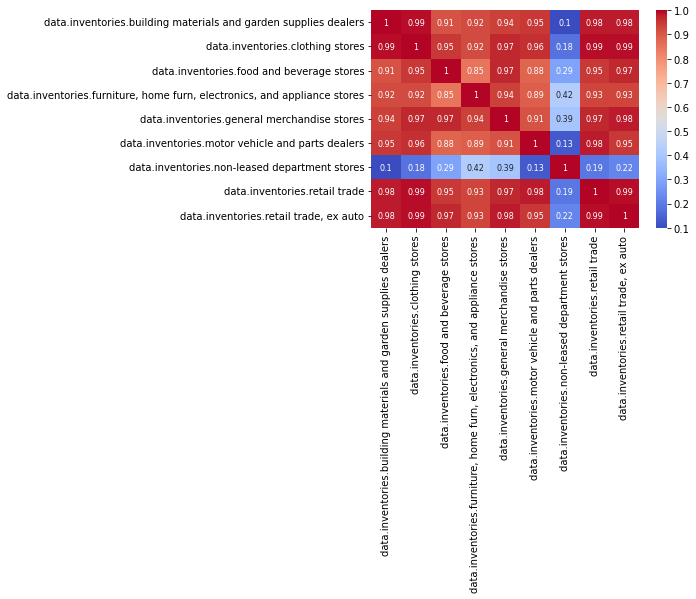

In [241]:
sb.heatmap(data=diff.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":8})
plt.show()

#### Can we predict future retail sales based on historical data and other relevant factors?

In [242]:
# Yes, by applying ML algorithms

#### Can we identify any outliers or anomalies in the retail sales data that require further investigation?

In [255]:
def cal_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    result = data[(data < lower_bound) | (data > upper_bound)]
    return result
data1 = diff.keys()
result = cal_outliers(diff[data1])
result


,data.inventories.building materials and garden supplies dealers,data.inventories.clothing stores,data.inventories.food and beverage stores,"data.inventories.furniture, home furn, electronics, and appliance stores",data.inventories.general merchandise stores,data.inventories.motor vehicle and parts dealers,data.inventories.non-leased department stores,data.inventories.retail trade,"data.inventories.retail trade, ex auto"
time.year,,,,,,,,,
1992,NaN,NaN,NaN,180985.0,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### What are the most significant challenges in reconciling the monthly and annual data for retail economic activity?

In [256]:
# Direct Comparison Monthly and annual data as timeframes vary.
# Consistency between monthly data and annual data can be complex as in monthly survey data is revised at the end of each month.